In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

covid19_global_forecasting_week_5_path = kagglehub.competition_download('covid19-global-forecasting-week-5')

print('Data source import complete.')


100%|██████████| 8.85M/8.85M [00:00<00:00, 11.2MB/s]

Extracting files...


Data source import complete.


In this notebook, I will create a predictive model for the COVID-19 Global Forecasting Week 5 dataset, which contains approximately 700,000 training entries. The objective is to predict target values for a test dataset comprising around 300,000 entries.

Initially, I performed data analysis, visualized the results using graphs, and examined the impact of COVID-19 specifically in India.

Finally, I developed an ensemble learning model that achieved an R-squared score of approximately 0.96.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
train = pd.read_csv('/content/drive/MyDrive/covid19-global-forecasting-week-5/train.csv')
test = pd.read_csv('/content/drive/MyDrive/covid19-global-forecasting-week-5/test.csv')

<ipython-input-5-6f1e4eb22d91>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/covid19-global-forecasting-week-5/train.csv')


In [6]:
train.head(3)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import seaborn as sns

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              969640 non-null  int64  
 1   County          880040 non-null  object 
 2   Province_State  917280 non-null  object 
 3   Country_Region  969640 non-null  object 
 4   Population      969640 non-null  int64  
 5   Weight          969640 non-null  float64
 6   Date            969640 non-null  object 
 7   Target          969640 non-null  object 
 8   TargetValue     969640 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 66.6+ MB


# <center>Top 20 in Population</center>

In [10]:
df1 = train.Population.groupby(train['Country_Region']).max().sort_values(ascending= False)
df10 = pd.DataFrame()
df20 = pd.DataFrame()
df10['population'] = df1.iloc[0:10]
df10['country']= df10.index
df20['population'] = df1.iloc[11:20]
df20['country'] = df20.index

Text(0.5, 1.0, 'Population Next 10')

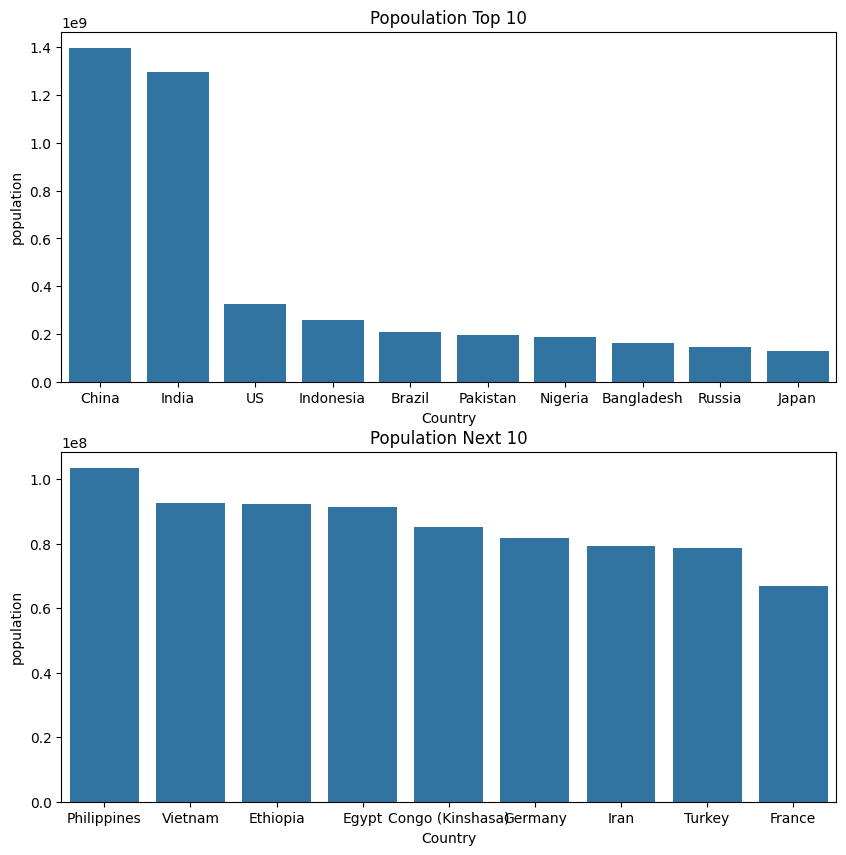

In [11]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='population', data=df10, orient ='v')
plt.xlabel('Country')
plt.title('Popoulation Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='population', data=df20, orient ='v')
plt.xlabel('Country')
plt.title('Population Next 10')

# <center>Top 20 in Confirmed Cases</center>

In [12]:
train1= train[train['Target']=='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index
data1.index = np.arange(0,len(data1))
data10 = data1.iloc[0:10,:]
data20 = data1.iloc[11:20,:]

Text(0.5, 1.0, 'Covid Cases Next 10')

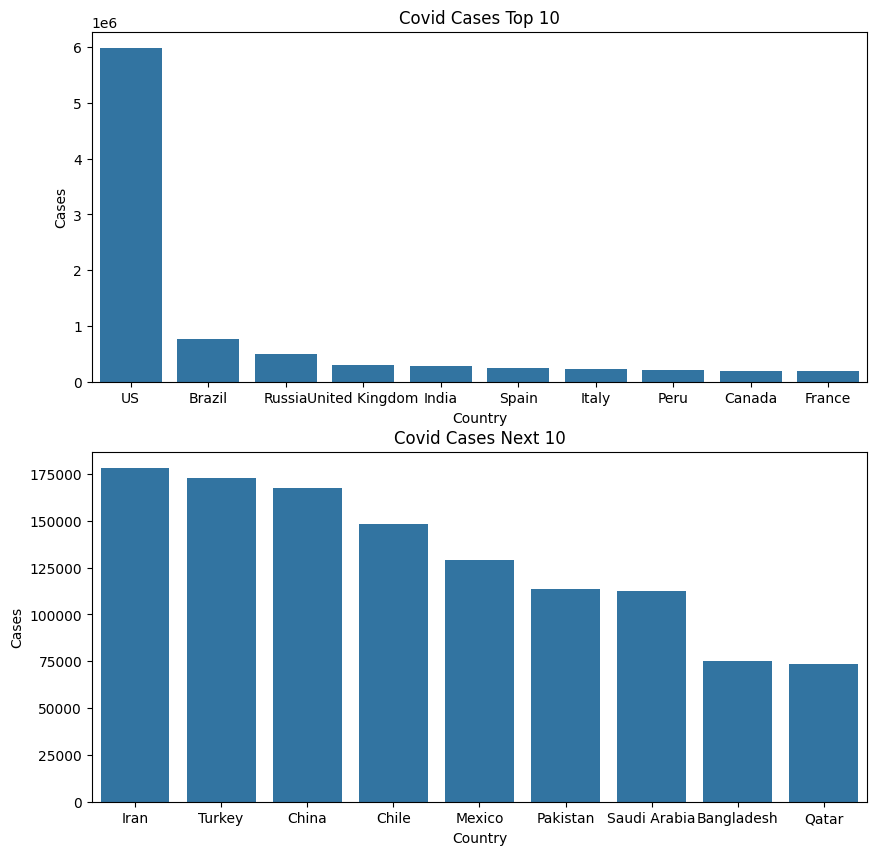

In [13]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='values', data=data10, orient ='v')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Covid Cases Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='values', data=data20, orient ='v')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Covid Cases Next 10')

# <center>Top 20 in Deaths</center>

In [14]:
train1= train[train['Target']!='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index
data1.index = np.arange(0,len(data1))
data10 = data1.iloc[0:10,:]
data20 = data1.iloc[11:20,:]

Text(0.5, 1.0, 'Covid Cases Next 10')

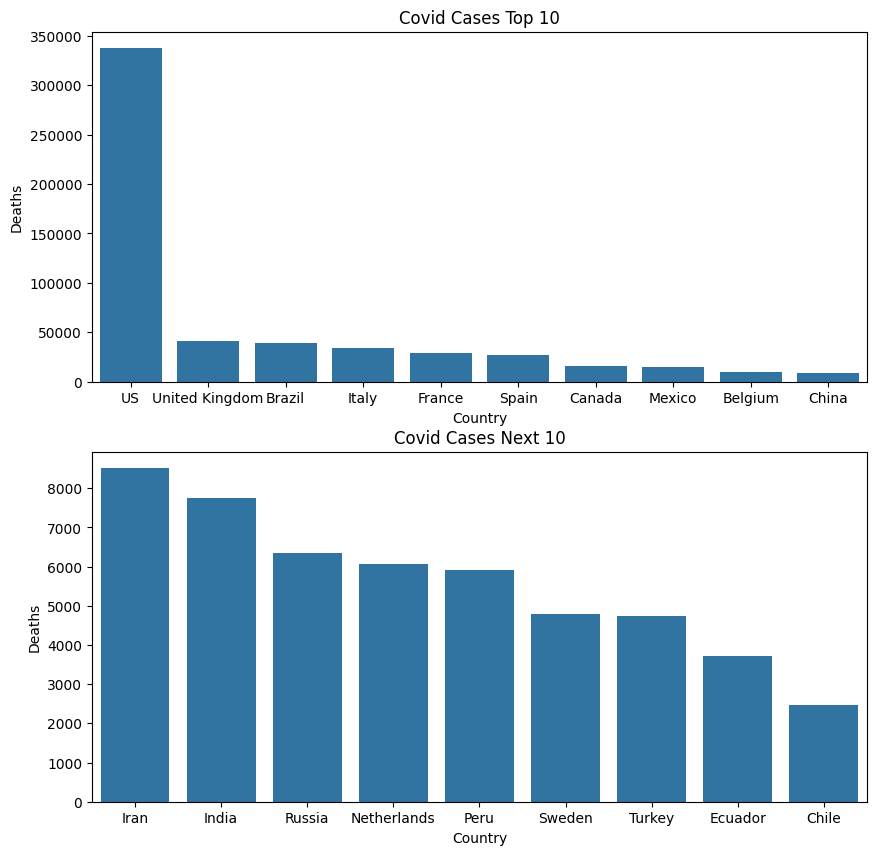

In [15]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
sns.barplot(x='country', y='values', data=data10, orient ='v')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Covid Cases Top 10')
plt.subplot(2,1,2)
sns.barplot(x='country', y='values', data=data20, orient ='v')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Covid Cases Next 10')

# <center>Fatalities vs Confirmed cases(WW)</center>

<ipython-input-16-b0c8b4edad37>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df[0],df[1]]


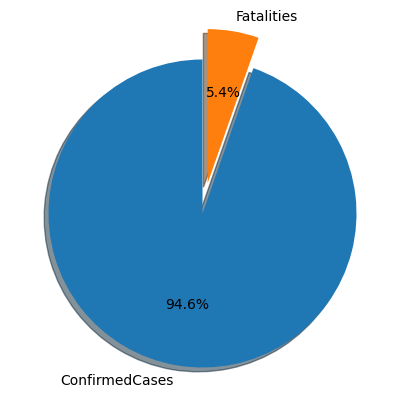

In [16]:
df = train['TargetValue'].groupby(train['Target']).sum()
labels =[df.index[0],df.index[1]]
sizes = [df[0],df[1]]
explode = (0, 0.2)

plt.figure(figsize = (5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

# <center>Analysing the cases in India</center>

In [17]:
india = train[train['Country_Region']=='India']

In [18]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 40320 to 40599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              280 non-null    int64  
 1   County          0 non-null      object 
 2   Province_State  0 non-null      object 
 3   Country_Region  280 non-null    object 
 4   Population      280 non-null    int64  
 5   Weight          280 non-null    float64
 6   Date            280 non-null    object 
 7   Target          280 non-null    object 
 8   TargetValue     280 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 21.9+ KB


In [19]:
india.drop(['County','Province_State'],axis =1,inplace =True)

<ipython-input-19-79f2f38d4556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india.drop(['County','Province_State'],axis =1,inplace =True)


In [20]:
india.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
40320,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0
40321,40322,India,1295210000,0.47660,2020-01-23,Fatalities,0


In [21]:
india.index = np.arange(0,len(india)) #rechanging the index

In [22]:
india.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
0,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0
1,40322,India,1295210000,0.47660,2020-01-23,Fatalities,0


In [23]:
ind = india[india['Target']=='ConfirmedCases']
ind.index = np.arange(0,len(ind))

In [24]:
ind.head(2)

,Id,Country_Region,Population,Weight,Date,Target,TargetValue
0,40321,India,1295210000,0.04766,2020-01-23,ConfirmedCases,0
1,40323,India,1295210000,0.04766,2020-01-24,ConfirmedCases,0


In [25]:
print("Date with more no.of cases in india {}".format((ind[ind['TargetValue']==ind['TargetValue'].max()]['Date']).values))
print("The cases are {}".format((ind[ind['TargetValue']==ind['TargetValue'].max()]['TargetValue']).values))

Date with more no.of cases in india ['2020-06-07']
The cases are [10864]


In [26]:
list1 = []
for i in range(2,7):
    date = '2020'+'-0'+str(i)+'-01'
    list1.append(ind[ind['Date']<date]['TargetValue'].sum())
print(list1)

[np.int64(1), np.int64(3), np.int64(1397), np.int64(34863), np.int64(190609)]


# <center>Monthly Progression of disease </center>

<Axes: >

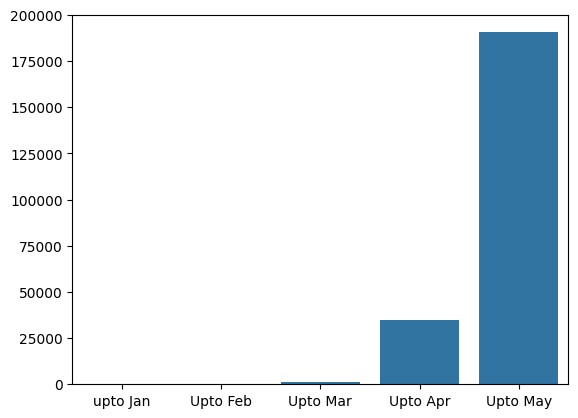

In [27]:
import seaborn as sns

# Provide x and y values as named arguments
sns.barplot(x=['upto Jan','Upto Feb','Upto Mar', 'Upto Apr','Upto May'], y=list1)

In [28]:
list2 =[]
for i in range(len(list1)):
    if i ==0:
        list2.append(list1[i])
    else:
        list2.append(list1[i]-list1[i-1])
print(list2)

[np.int64(1), np.int64(2), np.int64(1394), np.int64(33466), np.int64(155746)]


# <center>Count per month</center>

<Axes: >

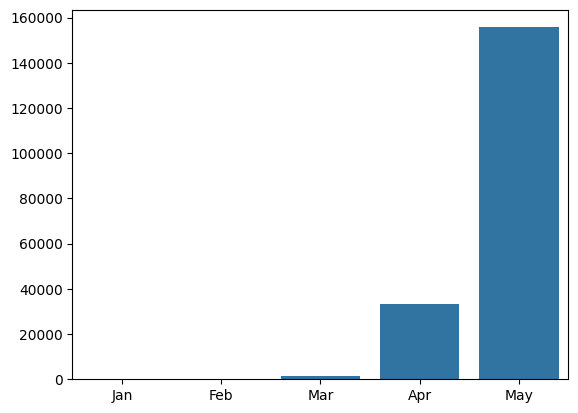

In [29]:
import seaborn as sns

labels = ['Jan','Feb','Mar','Apr','May']
# Pass x and y as keyword arguments
sns.barplot(x=labels, y=list2)

# <center>Fatalities vs Confirmed cases(India)</center>

In [30]:
df = india['TargetValue'].groupby(train['Target']).sum()
df

,TargetValue
Target,
ConfirmedCases,276583
Fatalities,7745


<ipython-input-31-6cdf05c3d272>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [df[0],df[1]]


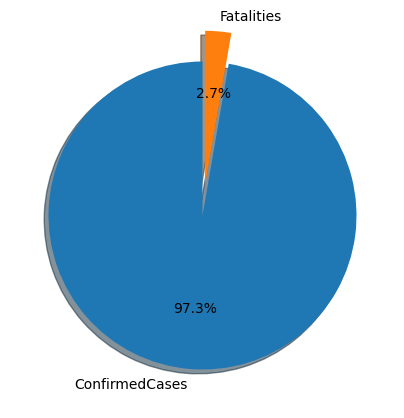

In [31]:
labels =[df.index[0],df.index[1]]
sizes = [df[0],df[1]]
explode = (0, 0.2)
plt.figure(figsize = (5,5))

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [32]:
wor = train[train['Target']=='ConfirmedCases']

In [33]:
print("Date with more no.of cases  {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['Date']).values))
print("The cases are {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['TargetValue']).values))
print("The Country is {}".format((wor[wor['TargetValue']==wor['TargetValue'].max()]['Country_Region']).values))

Date with more no.of cases  ['2020-04-24']
The cases are [36163]
The Country is ['US']


In [34]:
wor.columns

Index(['Id', 'County', 'Province_State', 'Country_Region', 'Population', 'Weight', 'Date', 'Target', 'TargetValue'], dtype='object')

In [35]:
independent_columns = ['Country_Region','Weight','Target','Date']
dependent_column = ['TargetValue']

In [36]:
X= train[independent_columns]
y = train[dependent_column]

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Target']=le.fit_transform(X['Target'])

<ipython-input-37-9a3eec07c912>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Target']=le.fit_transform(X['Target'])


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969640 entries, 0 to 969639
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country_Region  969640 non-null  object 
 1   Weight          969640 non-null  float64
 2   Target          969640 non-null  int64  
 3   Date            969640 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 29.6+ MB


# <center>Encoding Country according to it's rank in no.of confirmed cases</center>

In [39]:
train1= train[train['Target']=='ConfirmedCases']
data1 = pd.DataFrame()
data1['values'] =train1.TargetValue.groupby(train1['Country_Region']).sum().sort_values(ascending= False)
data1['country'] = data1.index

In [40]:
k = len(data1['country'])
dict1 = {}
for i in data1['country']:
    dict1[i] = k
    k =k-1

In [41]:
list1=[]
X['encoded_country']=0
for i in X['Country_Region']:
    list1.append(dict1[i])
X['encoded_country'] = list1

<ipython-input-41-5bf76b38bb99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['encoded_country']=0
<ipython-input-41-5bf76b38bb99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['encoded_country'] = list1


In [42]:
X['encoded_country'].value_counts()

,count
encoded_country,
187,895440
174,9520
179,3640
178,3080
184,3080
137,2520
164,1400
133,840
130,280


# <center> Picking out date and month seperately</center>

In [43]:
X['date_dup'] = pd.to_datetime(X['Date'])

<ipython-input-43-d42bf5083ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date_dup'] = pd.to_datetime(X['Date'])


In [44]:
X['month'] = 0
list1=[]
for i in X['date_dup']:
    list1.append(i.month)
X['month'] = list1

<ipython-input-44-bb0b91b7cbc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = 0
<ipython-input-44-bb0b91b7cbc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = list1


In [45]:
X['date'] = 0
list1=[]
for i in X['date_dup']:
    list1.append(i.day)
X['date'] = list1

<ipython-input-45-1ae30ca42394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = 0
<ipython-input-45-1ae30ca42394>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = list1


In [46]:
X.head(2)

,Country_Region,Weight,Target,Date,encoded_country,date_dup,month,date
0,Afghanistan,0.058359,0,2020-01-23,148,2020-01-23,1,23
1,Afghanistan,0.583587,1,2020-01-23,148,2020-01-23,1,23


In [47]:
X.drop(['Country_Region','Date','date_dup'],axis =1,inplace =True)

<ipython-input-47-d1a6be80a3d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Country_Region','Date','date_dup'],axis =1,inplace =True)


In [48]:
X.head(2)

,Weight,Target,encoded_country,month,date
0,0.058359,0,148,1,23
1,0.583587,1,148,1,23


# <center> Seeing the Correleation</center>

<Axes: >

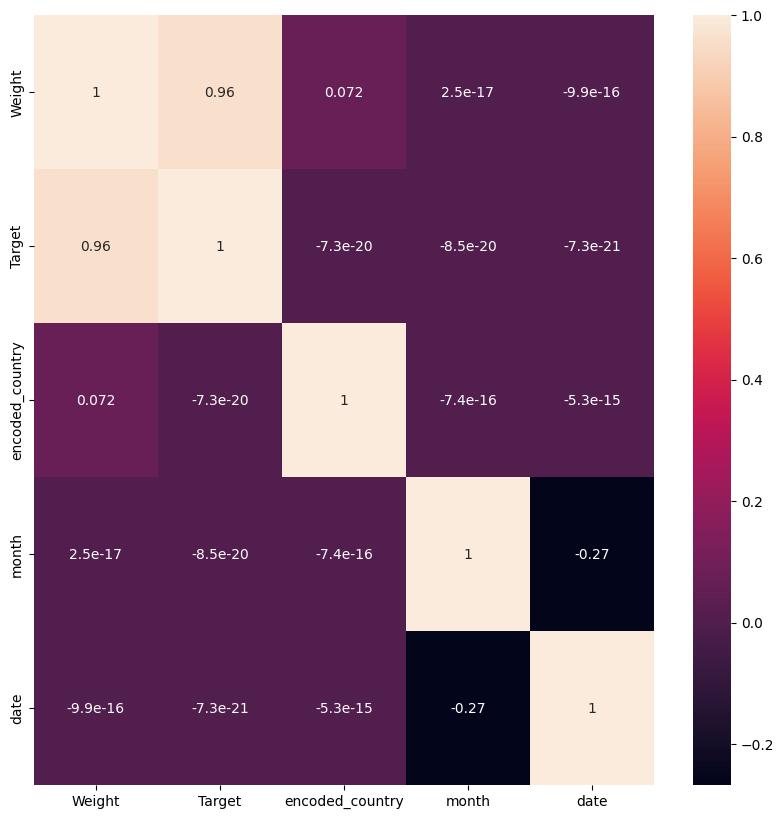

In [49]:
plt.figure(figsize =(10,10))
sns.heatmap(X.corr(),annot=True)

In [50]:
from sklearn.model_selection import train_test_split as tts

In [51]:
max_range =10

In [52]:
from sklearn.ensemble import RandomForestRegressor as regr
from sklearn.metrics import r2_score

# Actually I did some processing to find the best random state and I commented because it takes so much time to run
BEST RANDOM STATE:7

In [53]:
'''for i in range(max_range):
    X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =i)
    model = regr()
    model.fit(X_train,y_train)
    print("Random state {}\n".format(i))
    print(r2_score(y_test,model.predict(X_test)))'''

'for i in range(max_range):\n    X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =i)\n    model = regr()\n    model.fit(X_train,y_train)\n    print("Random state {}\n".format(i))\n    print(r2_score(y_test,model.predict(X_test)))'

In [54]:
X_train,X_test,y_train,y_test = tts(X,y,test_size =0.3,random_state =7)
model = regr()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [55]:
print(r2_score(y_test,model.predict(X_test)))

0.948057553850489


# <center>Preprocessing the test data in the same way we did for training data</center>

In [56]:
test = test[independent_columns]

In [57]:
list1=[]
test['encoded_country']=0
for i in test['Country_Region']:
    list1.append(dict1[i])
test['encoded_country'] = list1

<ipython-input-57-215f11cd41a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['encoded_country']=0


In [58]:
test['date_dup'] = pd.to_datetime(test['Date'])

In [59]:
test['month'] = 0
list1=[]
for i in test['date_dup']:
    list1.append(i.month)
test['month'] = list1

In [60]:
test['date'] = 0
list1=[]
for i in test['date_dup']:
    list1.append(i.day)
test['date'] = list1

In [61]:
test.head(2)

,Country_Region,Weight,Target,Date,encoded_country,date_dup,month,date
0,Afghanistan,0.058359,ConfirmedCases,2020-04-27,148,2020-04-27,4,27
1,Afghanistan,0.583587,Fatalities,2020-04-27,148,2020-04-27,4,27


In [62]:
test.drop(['Country_Region','Date','date_dup'],axis =1,inplace =True)

In [63]:
test.head(2)

,Weight,Target,encoded_country,month,date
0,0.058359,ConfirmedCases,148,4,27
1,0.583587,Fatalities,148,4,27


In [64]:
le1 =LabelEncoder()
test['Target'] = le1.fit_transform(test['Target'])

In [65]:
pred = model.predict(test)

In [66]:
t =pd.read_csv('/content/drive/MyDrive/covid19-global-forecasting-week-5/test.csv')
ss = pd.read_csv('/content/drive/MyDrive/covid19-global-forecasting-week-5/submission.csv')

In [67]:
import pandas as pd

# Assuming t and pred are defined and available in your environment

# ipython-input-72-9fbee651c05e
output = pd.DataFrame({'Id': t.ForecastId, 'TargetValue': pred})

# ipython-input-73-9fbee651c05e
a = output.groupby(['Id'])['TargetValue'].quantile(q=0.05).reset_index()
b = output.groupby(['Id'])['TargetValue'].quantile(q=0.5).reset_index()
c = output.groupby(['Id'])['TargetValue'].quantile(q=0.95).reset_index()

# ipython-input-75-9fbee651c05e
a.columns = ['Id', 'q0.05']
b.columns = ['Id', 'q0.5']
c.columns = ['Id', 'q0.95']
a = pd.concat([a, b['q0.5'], c['q0.95']], axis=1)  # Changed 1 to axis=1
a['q0.05'] = a['q0.05']
a['q0.5'] = a['q0.5']
a['q0.95'] = a['q0.95']

# ipython-input-0-9fbee651c05e
sub = pd.melt(a, id_vars=['Id'], value_vars=['q0.05', 'q0.5', 'q0.95'])
sub['variable'] = sub['variable'].str.replace("q", "", regex=False)
sub['ForecastId_Quantile'] = sub['Id'].astype(str) + '_' + sub['variable']
sub['TargetValue'] = sub['value']
sub = sub[['ForecastId_Quantile', 'TargetValue']]
sub.reset_index(drop=True, inplace=True)
sub.to_csv("submission.csv", index=False)
#sub.head()




In [68]:
# ipython-input-76-9fbee651c05e
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935010 entries, 0 to 935009
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ForecastId_Quantile  935010 non-null  object 
 1   TargetValue          935010 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.3+ MB
